In [1]:
import cv2
import numpy as np
import face_recognition

In [38]:
IMG_SIZE: int = 224
NUM_FRAMES_PER_VIDEO: int = 16
IMG_SIZE: int = 224

In [49]:
URL = 'http://localhost:3001/videos/'
video ='6xfgIsjz2EAF4zij1TN6YSeLVjHa9AnH5Qo3URnfbvMGCZ2IgMpTd8qKHVWOozPN.webm'
video2='TxMrwKCw9rL2bzvq3PbYZV633mxlprahk7kaf9jblSdvfAtTS1HLYoAzBxgAqBCI.webm'

In [50]:
cvideo = URL+video
cvideo2 = URL+video2

In [55]:
cap = cv2.VideoCapture(cvideo)
cap2= cv2.VideoCapture(cvideo2)

In [54]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(height, width)

720.0 1280.0


In [56]:
frames: list = []
is_there_frame: bool = True
num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
resampling_rate: int = int(num_total_frames / NUM_FRAMES_PER_VIDEO)
idf: int = 0
while is_there_frame and len(frames) < NUM_FRAMES_PER_VIDEO:
    idf += 1
    is_there_frame, frame = cap.read()
    if frame is None: 
        print(np.array([]))
    if idf % resampling_rate == 0:
        # grayscale
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # resize
        # frame = cv2.resize(frame, (height, width))
        frames.append(frame)
# assert len(frames)==NUM_FRAMES_PER_VIDEO
print(np.array(frames))


[[[[240 228 208]
   [240 228 208]
   [240 228 208]
   ...
   [ 25  30  41]
   [ 18  28  40]
   [ 18  28  40]]

  [[240 228 208]
   [240 228 208]
   [240 228 208]
   ...
   [ 25  30  41]
   [ 18  28  40]
   [ 18  28  40]]

  [[240 228 208]
   [240 228 208]
   [240 228 208]
   ...
   [ 27  30  43]
   [ 20  26  42]
   [ 21  27  43]]

  ...

  [[ 64  52 116]
   [ 69  57 121]
   [ 76  67 121]
   ...
   [ 63  66  84]
   [ 62  65  83]
   [ 62  65  83]]

  [[ 63  51 115]
   [ 69  57 121]
   [ 76  67 121]
   ...
   [ 63  68  86]
   [ 61  66  84]
   [ 60  65  83]]

  [[ 62  50 114]
   [ 67  55 119]
   [ 77  68 122]
   ...
   [ 64  69  87]
   [ 61  66  84]
   [ 58  63  81]]]


 [[[247 230 204]
   [247 230 204]
   [247 230 204]
   ...
   [ 31  31  43]
   [ 29  27  41]
   [ 29  27  41]]

  [[247 230 204]
   [247 230 204]
   [247 230 204]
   ...
   [ 31  31  43]
   [ 29  27  41]
   [ 29  27  41]]

  [[247 230 204]
   [247 230 204]
   [247 230 204]
   ...
   [ 34  32  46]
   [ 33  27  44]
   [ 34  28

In [80]:
print(len(frames))

16


In [57]:
from PIL import Image, ImageDraw
from IPython.display import display

In [58]:
pil_image = Image.fromarray(frames[0])
pil_image1 = Image.fromarray(frames[1])

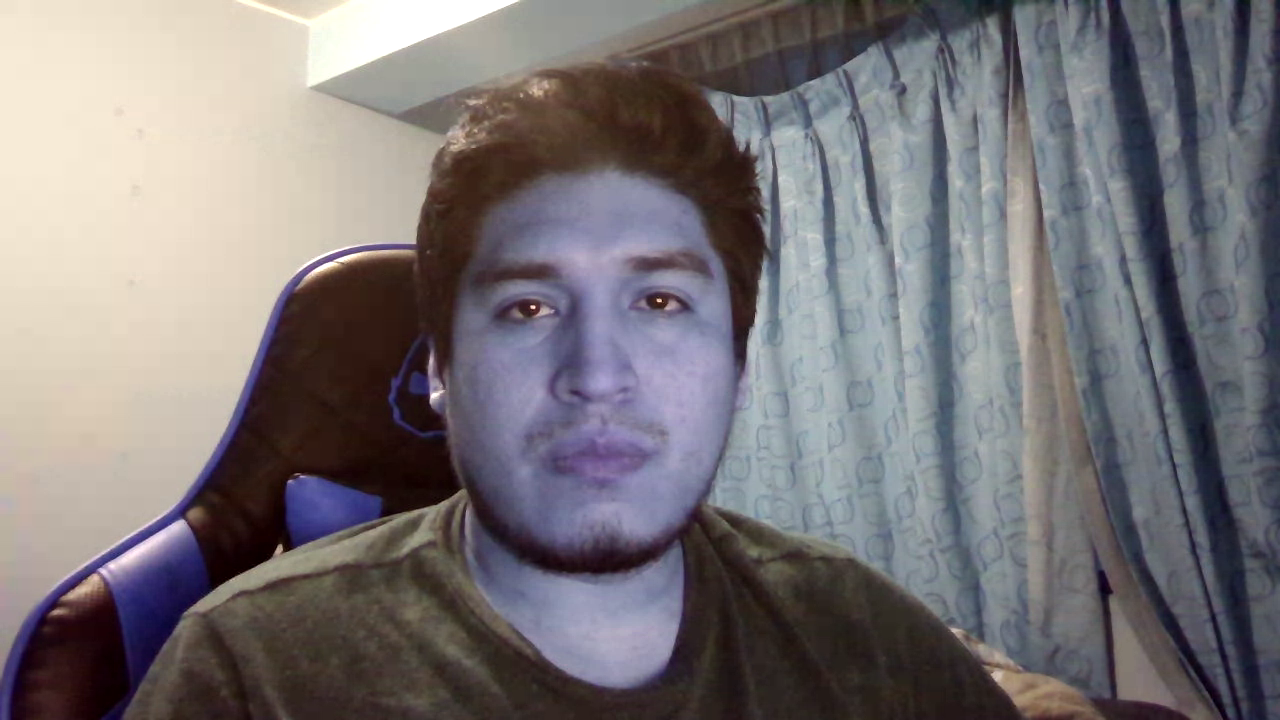

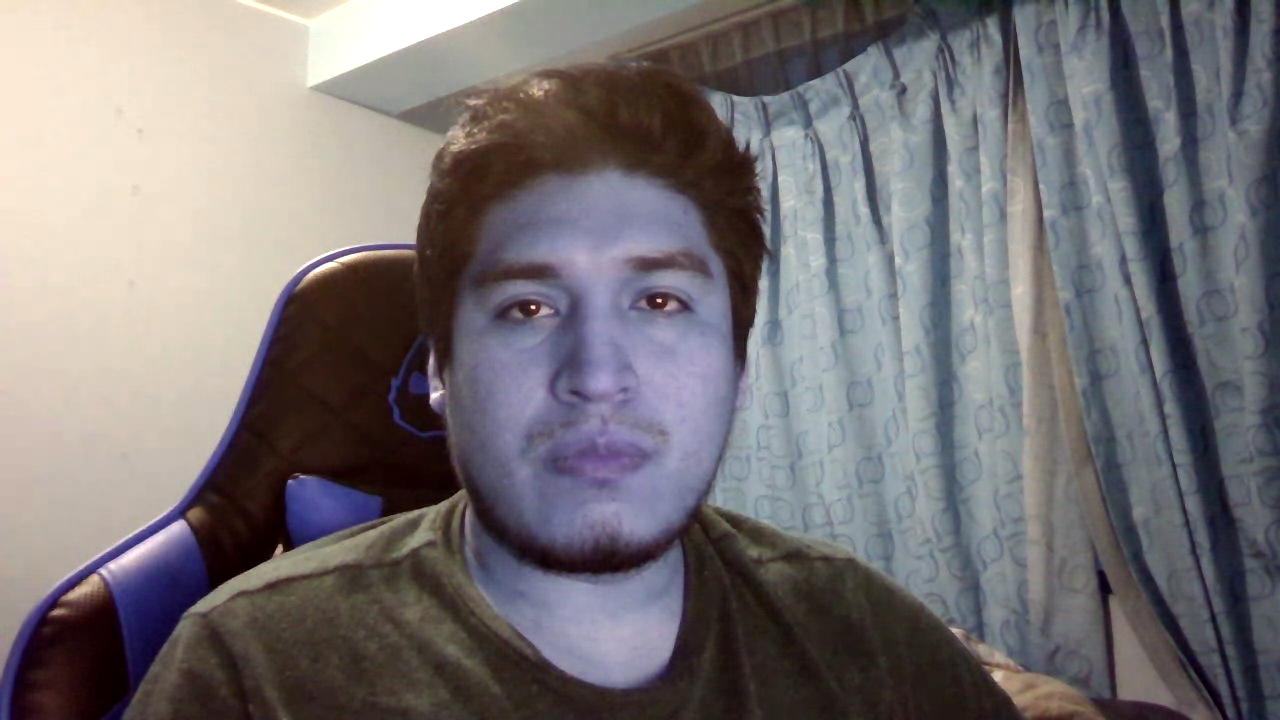

In [59]:
display(pil_image)
display(pil_image1)

In [78]:
# img = face_recognition.load_image_file('prueba2.jpg')
# img2=  face_recognition.load_image_file('prueba.png')
face_lo = face_recognition.face_encodings(frames[0])[0]
face_lo2 = face_recognition.face_encodings(frames[10])[0]
# face_lo3 = face_recognition.face_encodings(img2)[0]
# print(face_lo)
# print(face_lo2)
# print(face_lo3)


In [79]:
matches = face_recognition.compare_faces([face_lo], face_lo2)
print(matches)

[True]


In [59]:
num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(num_total_frames)

100.0
